In [ ]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload 2

In [ ]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

## Test the from_csv method in the Mission class

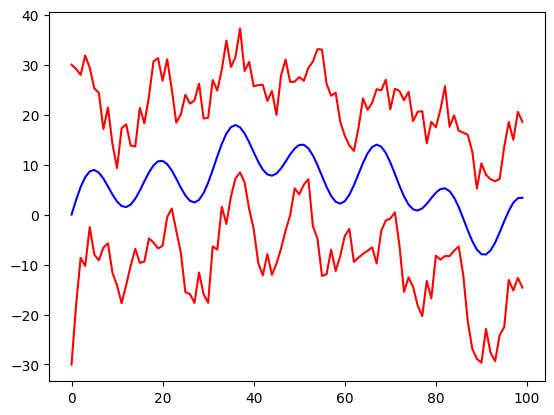

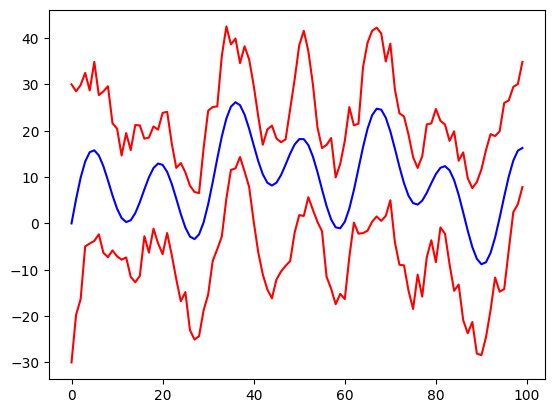

In [31]:
from uuv_mission.dynamic import Mission
from uuv_mission.terrain import plot_reference_and_terrain as plot_terrain

mission_csv = Mission.from_csv("../data/mission.csv")
plot_terrain(mission_csv.reference, mission_csv.cave_height, mission_csv.cave_depth)

mission_random = Mission.random_mission(duration=100, scale=10.0)
plot_terrain(mission_random.reference, mission_random.cave_height, mission_random.cave_depth)

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

In [ ]:
# Import relevant modules
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission

sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("../data/mission.csv")

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)